In [1]:
import sys

In [2]:
sys.executable

'/opt/conda/bin/python'

In [3]:
import tensorflow

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [7]:
import tensorflow as tf

In [5]:
import Cell_BLAST as cb

In [8]:
print(tf.__version__)

1.12.0


In [11]:
tf.test.is_gpu_available()

True

In [12]:
import logging
import numpy as np
import pandas as pd
import tensorflow as tf
import Cell_BLAST as cb

np.set_printoptions(threshold=200)
pd.set_option("max_rows", 20)
tf.logging.set_verbosity(0)
cb.config.N_JOBS = 4
cb.config.RANDOM_SEED = 0

In [17]:
import os 
os.listdir() 

['home',
 'sys',
 'var',
 'tmp',
 'lib64',
 'dev',
 'lib',
 'media',
 'sbin',
 'run',
 'mnt',
 'root',
 'boot',
 'srv',
 'etc',
 'proc',
 'bin',
 'opt',
 'usr',
 'cellblastimage',
 '.ipynb_checkpoints',
 'Untitled.ipynb',
 '.dockerenv',
 'NGC-DL-CONTAINER-LICENSE']

In [18]:
baron_human = cb.data.ExprDataSet.read_dataset("/cellblastimage/Baron_human.h5")

In [19]:
baron_human

In [20]:
baron_human.exprs

<8569x20125 sparse matrix of type '<class 'numpy.float64'>'
	with 16171764 stored elements in Compressed Sparse Row format>

In [21]:
baron_human.obs.head()

,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,latent_1,latent_10,latent_2,latent_3,latent_4,...,latent_6,latent_7,latent_8,latent_9,library,organ,organism,platform,tSNE1,tSNE2
human1_lib1.final_cell_0001,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,-1.055057,-0.425832,-0.178391,0.469974,-1.803867,...,-0.197705,0.768246,2.063935,-0.991668,lib1,Pancreas,Homo sapiens,inDrop,-28.195871,-49.691952
human1_lib1.final_cell_0002,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,-0.758462,0.449620,-0.716853,0.535101,-1.133215,...,-0.182949,1.727783,1.905860,-0.657007,lib1,Pancreas,Homo sapiens,inDrop,-37.652672,-50.575142
human1_lib1.final_cell_0003,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,-0.000975,0.723924,0.913341,0.699751,-2.052160,...,-0.027749,1.412538,2.683464,-0.256752,lib1,Pancreas,Homo sapiens,inDrop,-39.740219,-60.609909
human1_lib1.final_cell_0004,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,-0.123044,0.998041,0.136771,0.819637,-1.321236,...,0.363892,2.582057,1.831944,-0.447564,lib1,Pancreas,Homo sapiens,inDrop,-39.123859,-55.019394
human1_lib1.final_cell_0005,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,-1.740050,-0.562631,0.733147,0.297761,-1.249413,...,-0.931541,1.874652,1.676998,-1.080205,lib1,Pancreas,Homo sapiens,inDrop,-45.097713,-44.759388


In [22]:
baron_human.var.head()

""
A1BG
A1CF
A2M
A2ML1
A4GALT


In [23]:
baron_human.uns["seurat_genes"]

array(['ABCC8', 'ACE', 'ACKR3', ..., 'ZNF503', 'ZSCAN9', 'ZSWIM4'],
      dtype='<U11')

#  Gene Selection 

In [24]:
# This is a reimplementation of the FindVariableGenes() function in Seurat v2.
%%capture
selected_genes, axes = baron_human.find_variable_genes(grouping="donor")

In [25]:
selected_genes

array(['ABCC8', 'ACE', 'ACKR3', ..., 'ZSCAN9', 'ZSWIM4', 'pk'],
      dtype='<U11')

In [ ]:
#For this dataset this was already calculated and stored, so it would be identical
np.setdiff1d(selected_genes, baron_human.uns["seurat_genes"]).size, \
np.setdiff1d(baron_human.uns["seurat_genes"], selected_genes).size

# Unsupervised dimension reduction

Build and fit a DIRECTi model (for Cell BLAST) with the one-step fit_DIRECTi() function. Training the model for this dataset on p2.xlarge takes <5 min.

In [28]:
%%capture
model = cb.directi.fit_DIRECTi(
    baron_human, genes=selected_genes,
    latent_dim=10, cat_dim=20
)


[INFO] Cell BLAST: Using model path: /tmp/tmp4_6wiltg


Project cells into the cell embedding space using the inference() method. It is recommended that you store cell embeddings into the latent slot of the original dataset object.

In [29]:
baron_human.latent = model.inference(baron_human)

Now we visualized the cell query. A successful query is when different cell types can readily be distinguished.
If certain cell types are largely intermingled at this step, they are unlikely to be unambiguously predicted. It might be useful to reconsider the feature selection step or model hyperparameter setting (see function documentation of find_variable_genes() and fit_DIRECTi() for details).

[INFO] Cell BLAST: Computing tSNE...


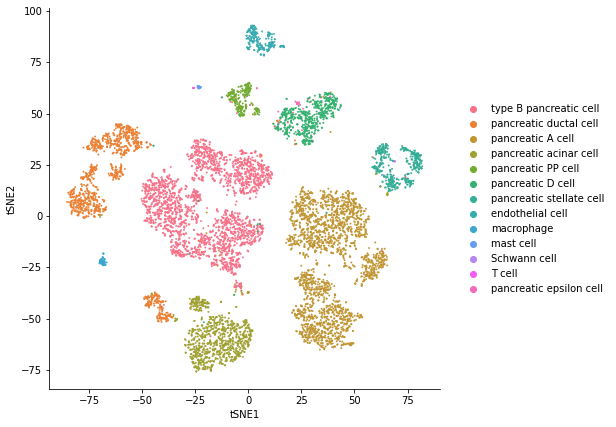

In [30]:
ax = baron_human.visualize_latent("cell_ontology_class")

In [32]:
#Let's save this model to see how big it is (it is 4.0K)
model.save("./cellblastimage/baron_human_model")
model.close()
del model
model = cb.directi.DIRECTi.load("./cellblastimage/baron_human_model")

[INFO] Cell BLAST: Using model path: ./cellblastimage/baron_human_model
[INFO] Cell BLAST: Loading latent module weights...
[INFO] Cell BLAST: Loading prob module weights...
[INFO] Cell BLAST: Loading rmbatch module weights...


In [33]:
model

We can use that model to project other datasets. For example the Muraro dataset (Muraro, M. et al., Cell Systems, 2016), which also profiled human pancreatic islets. See all the datasets here https://cblast.gao-lab.org/download
There will be a warning saying that we have some genes missing in the new dataset, but it doesn't really matter as long as the number is small.

[WARNING] Cell BLAST: 18 out of 769 variables are not found, will be set to zero!
[INFO] Cell BLAST: 'ACKR3', 'ADGRF5', 'ADGRL4', 'ADIRF', 'CEMIP', 'CXCL8', 'HLA.B', 'HLA.DPA1', 'HLA.DPB1', 'HLA.DRA', 'HLA.DRB1', 'IL3RA', 'MIR4435.2HG', 'PCAT19', 'PRSS2', 'SDCBP2', 'SMIM24', 'pk'
[INFO] Cell BLAST: Computing tSNE...


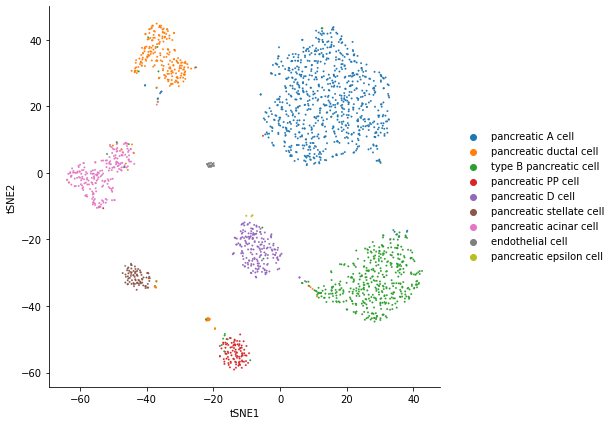

In [35]:
muraro = cb.data.ExprDataSet.read_dataset("/cellblastimage/Muraro.h5")
muraro.latent = model.inference(muraro)
ax = muraro.visualize_latent("cell_ontology_class")

We can see that distinct cell types are still well separated.

# Batch effect correction